In [1]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\adam\Desktop\Combustioncode-master\simple 2 step model.xlsx')

#Remember to change the path so it works on your computer

s1 = wb['Sheet1']
t = get_xcel_col(s1, 'A', 11, 57)
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)

A1 = 7282.63
A2 = 9182476
E1 = 70372.5
E2 = 1515186
Y1 = .63007
Y2 = .98458

def r_m(A1,A2,E1,E2,Y1,Y2):
    V_m = np.zeros(len(t)-1)
    r_m = np.zeros(len(t)-1)
    dt2 = np.zeros(len(t)-1)
    dV_o = np.zeros(len(t)-1)
    dm_o = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt2[i] = t[i+1] - t[i] 
        
    dm_o[0] = 1
    dV_o[0] = 0
    r_m[0] = -(A1*np.exp(-E1/R/T[0])+A2*np.exp(-E2/R/T[0]))*dm_o[0]
    V_m[0] = (Y1*A1*np.exp(-E1/R/T[0])+Y2*A2*np.exp(-E2/R/T[0]))*dm_o[0]

    for i in range(1, len(t)-1):
        dm_o[i] = dm_o[i-1]+r_m[i-1]*dt2[i]
        r_m[i] = -(A1*np.exp(-E1/R/T[i])+A2*np.exp(-E2/R/T[i]))*dm_o[i]
        V_m[i] = (Y1*A1*np.exp(-E1/R/T[i])+Y2*A2*np.exp(-E2/R/T[i]))*dm_o[i]
        dV_o[i] = dV_o[i-1]+V_m[i]*dt2[i]
    return(r_m, V_m, dV_o,dm_o)
def f(X):
    A1,A2,E1,E2,Y1,Y2 = X
    e1 = (r_e(V_e, t)[0] - r_m(A1,A2,E1,E2,Y1,Y2)[1])**2
    e2 = (V_e[1:46] - r_m(A1,A2,E1,E2,Y1,Y2)[2])**2
    return(sum(e2)+sum(e1))

res = minimize(f,(A1,A2,E1,E2,Y1,Y2))
A1,A2,E1,E2,Y1,Y2 = res.x
print(A1)
print(A2)
print(E1)
print(E2)
print(Y1)
print(Y2)

e1 = (r_e(V_e, t)[0] - r_m(A1,A2,E1,E2,Y1,Y2)[1])**2
e2 = (r_e(V_e, t)[1] - r_m(A1,A2,E1,E2,Y1,Y2)[0])**2

5527.428238590847
9182476.0
73114.90299367007
1515186.0
0.6484568998277346
0.98458


In [3]:
print(r_m(A1,A2,E1,E2,Y1,Y2)[3])

[ 1.00000000e+00  9.99753205e-01  9.99392331e-01  9.98871298e-01
  9.98130214e-01  9.97088332e-01  9.95642565e-01  9.93657263e-01
  9.90962180e-01  9.87342987e-01  9.82534253e-01  9.76214100e-01
  9.67988748e-01  9.57395665e-01  9.43896350e-01  9.26881493e-01
  9.05671661e-01  8.79548689e-01  8.47774499e-01  8.09666547e-01
  7.64652644e-01  7.12399988e-01  6.52870995e-01  5.86541048e-01
  5.14471378e-01  4.38383267e-01  3.60728487e-01  2.84623012e-01
  2.13347552e-01  1.50166187e-01  9.77309968e-02  5.76857367e-02
  3.00793947e-02  1.33251711e-02  4.71861063e-03  1.19517067e-03
  1.67644653e-04  2.04334538e-06 -2.66991593e-07  7.75793766e-08
 -3.63590803e-08  2.42226069e-08 -2.14579674e-08  2.42104814e-08
 -3.37981012e-08]


In [4]:
t2 = get_xcel_col(s1, 'T', 11, 56)
T_c2 = get_xcel_col(s1, 'U', 11, 56)
T2 = T_c2 + np.array(273.15)
m_e2 = get_xcel_col(s1, 'W', 11, 56)
c2 = m_e2 / np.array(s1['W11'].value)
V_e2 = 1 - c2
def r_e2(V_e2, t2):
    dV_e2 = []
    dt1_2 = []
    dm_e2 = []
    for i in range(1, len(V_e2)):
        dV_e2.append(V_e2[i] - V_e2[i-1])
        dm_e2.append(m_e2[i]-m_e2[i-1])
    for i in range(1, len(t2)):
        dt1_2.append(t2[i] - t2[i-1])
    dV_e2 = np.array(dV_e2)
    dm_e2 = np.array(dm_e2)
    dt1_2 = np.array(dt1_2)
    r_e2 = dV_e2 / dt1_2
    r_em2 = dm_e2 / dt1_2
    return(r_e2, r_em2)

A1_2 = 7200
A2_2 = 9000000
E1_2 = 70000
E2_2 = 1500600
Y1_2 = .63
Y2_2 = .98

def r_m2(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2):
    V_m2 = np.zeros(len(t2)-1)
    r_m2 = np.zeros(len(t2)-1)
    dt2_2 = np.zeros(len(t2)-1)
    dV_o2 = np.zeros(len(t2)-1)
    dm_o2 = np.zeros(len(t2)-1)
    for i in range(1, len(t2)-1):
        dt2_2[i] = t2[i+1] - t2[i] 
    dm_o2[0] = 1   
    dV_o2[0] = 0
    r_m2[0] = -(A1_2*np.exp(-E1_2/R/T2[0])+A2_2*np.exp(-E2_2/R/T2[0]))*dm_o2[0]
    V_m2[0] = (Y1_2*A1_2*np.exp(-E1_2/R/T2[0])+Y2_2*A2_2*np.exp(-E2_2/R/T2[0]))*dm_o2[0]

    for i in range(1, len(t2)-1):
        dm_o2[i] = dm_o2[i-1]+r_m2[i-1]*dt2_2[i]
        r_m2[i] = -(A1_2*np.exp(-E1_2/R/T2[i])+A2_2*np.exp(-E2_2/R/T2[i]))*dm_o2[i]
        V_m2[i] = (Y1_2*A1_2*np.exp(-E1_2/R/T2[i])+Y2_2*A2_2*np.exp(-E2_2/R/T2[i]))*dm_o2[i]
        dV_o2[i] = dV_o2[i-1]+V_m2[i]*dt2_2[i]
    return(r_m2, V_m2, dV_o2)
def f2(X):
    A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2 = X
    e1_2 = (r_e2(V_e2, t2)[0] - r_m2(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2)[1])**2
    e2_2 = (V_e2[1:45] - r_m2(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2)[2])**2
    return(sum(e2_2)+sum(e1_2))

res = minimize(f2,(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2))
A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2 = res.x
print(A1_2)
print(A2_2)
print(E1_2)
print(E2_2)
print(Y1_2)
print(Y2_2)

e1_2 = (r_e2(V_e2, t2)[0] - r_m2(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2)[1])**2
e2_2 = (r_e2(V_e2, t2)[1] - r_m2(A1_2,A2_2,E1_2,E2_2,Y1_2,Y2_2)[0])**2

6143.8207525553735
9000000.0
71579.2124099252
1500600.0
0.6538232287089343
0.98


In [5]:
t3 = get_xcel_col(s1, 'AM', 11, 55)
T_c3 = get_xcel_col(s1, 'AN', 11, 55)
T3 = T_c3 + np.array(273.15)
m_e3 = get_xcel_col(s1, 'AP', 11, 55)
c3 = m_e3 / np.array(s1['AP11'].value)
V_e3 = 1 - c3
def r_e3(V_e3, t3):
    dV_e3 = []
    dt1_3 = []
    dm_e3 = []
    for i in range(1, len(V_e3)):
        dV_e3.append(V_e3[i] - V_e3[i-1])
        dm_e3.append(m_e3[i]-m_e3[i-1])
    for i in range(1, len(t3)):
        dt1_3.append(t3[i] - t3[i-1])
    dV_e3 = np.array(dV_e3)
    dm_e3 = np.array(dm_e3)
    dt1_3 = np.array(dt1_3)
    r_e3 = dV_e3 / dt1_3
    r_em3 = dm_e3 / dt1_3
    return(r_e3, r_em3)

A1_3 = 7200
A2_3 = 9000000
E1_3 = 70000
E2_3 = 1500600
Y1_3 = .63
Y2_3 = .98

def r_m3(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3):
    V_m3 = np.zeros(len(t3)-1)
    r_m3 = np.zeros(len(t3)-1)
    dt2_3 = np.zeros(len(t3)-1)
    dV_o3 = np.zeros(len(t3)-1)
    dm_o3 = np.zeros(len(t3)-1)
    for i in range(1, len(t3)-1):
        dt2_3[i] = t3[i+1] - t3[i] 
        
    dV_o3[0] = 0
    dm_o3[0] = 1   
    r_m3[0] = -(A1_3*np.exp(-E1_3/R/T3[0])+A2_3*np.exp(-E2_3/R/T3[0]))*dm_o3[0]
    V_m3[0] = (Y1_3*A1_3*np.exp(-E1_3/R/T3[0])+Y2_3*A2_3*np.exp(-E2_3/R/T3[0]))*dm_o3[0]

    for i in range(1, len(t3)-1):
        dm_o3[i] = dm_o3[i-1]+r_m3[i-1]*dt2_3[i]
        r_m3[i] = -(A1_3*np.exp(-E1_3/R/T3[i])+A2_3*np.exp(-E2_3/R/T3[i]))*dm_o3[i]
        V_m3[i] = (Y1_3*A1_3*np.exp(-E1_3/R/T3[i])+Y2_3*A2_3*np.exp(-E2_3/R/T3[i]))*dm_o3[i]
        dV_o3[i] = dV_o3[i-1]+V_m3[i]*dt2_3[i]
    return(r_m3, V_m3, dV_o3)
def f3(X):
    A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3 = X
    e1_3 = (r_e3(V_e3, t3)[0] - r_m3(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3)[1])**2
    e2_3 = (V_e3[1:44] - r_m3(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3)[2])**2
    return(sum(e2_3)+sum(e1_3))

res = minimize(f3,(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3))
A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3 = res.x
print(A1_3)
print(A2_3)
print(E1_3)
print(E2_3)
print(Y1_3)
print(Y2_3)

e1_3 = (r_e3(V_e3, t3)[0] - r_m3(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3)[1])**2
e2_3 = (r_e3(V_e3, t3)[1] - r_m3(A1_3,A2_3,E1_3,E2_3,Y1_3,Y2_3)[0])**2

8171.818307625614
9000000.0
68478.21823123736
1500600.0
0.6301147144377743
0.98


In [6]:

A1T = 7000
A2T = 9000000
E1T = 70000
E2T = 1500000
Y1T = .6
Y2T = .9

def totf(XT):
    A1T,A2T,E1T,E2T,Y1T,Y2T = XT
    e1_2T = (r_e2(V_e2, t2)[0] - r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    e2_2T = (V_e2[1:45] - r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[2])**2
    e1T = (r_e(V_e, t)[0] - r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    e2T = (V_e[1:46] - r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[2])**2
    e1_3T = (r_e3(V_e3, t3)[0] - r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[1])**2
    e2_3T = (V_e3[1:44] - r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[2])**2
    return(sum(e1T) + sum(e2T) + sum(e1_2T) + sum(e2_2T) + sum(e1_3T) + sum(e2_3T))
res = minimize(totf,(A1T,A2T,E1T,E2T,Y1T,Y2T))
A1T,A2T,E1T,E2T,Y1T,Y2T = res.x
print(A1T)
print(A2T)
print(E1T)
print(E2T)
print(Y1T)
print(Y2T)

6358.576055667774
9000000.0
70963.25729033833
1500000.0
0.6396977143269206
0.9


In [7]:
res

      fun: 0.4837999873171844
 hess_inv: array([[ 5.57488671,  0.        , -2.89974406,  0.        ,  0.07442908,
         0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.89974406,  0.        ,  1.60839378,  0.        , -0.0384033 ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.07442908,  0.        , -0.0384033 ,  0.        ,  0.00865887,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])
      jac: array([-7.48783350e-07,  0.00000000e+00, -4.76837158e-07,  0.00000000e+00,
        3.54647636e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 328
      nit: 11
     njev: 41
   status: 0
  success: True
        x: array([6.35857606e+03, 9.00000000e+06, 7.09632573e+04, 1.50000000e+06,
       6.39697714e-01, 9.00000000e-01])

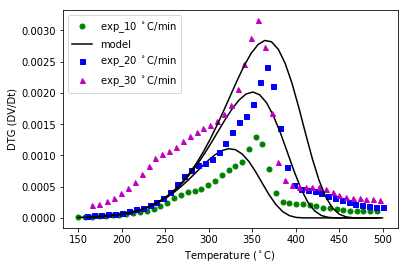

In [8]:
plt.plot(T_c[0:45],r_e(V_e,t)[0],'o',ms=5,color = 'green',label='exp_10 $^\circ$C/min')
plt.plot(T_c[0:45],r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[1],color = 'k',label='model')
plt.plot(T_c2[0:44],r_e2(V_e2,t2)[0],'s',ms=5,color = 'Blue',label='exp_20 $^\circ$C/min')
plt.plot(T_c2[0:44],r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[1],color = 'k')
plt.plot(T_c3[0:43],r_e3(V_e3,t3)[0],'^',ms=5,color = 'M',label='exp_30 $^\circ$C/min')
plt.plot(T_c3[0:43],r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[1],color = 'k')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('DTG (DV/Dt)')
plt.legend()
plt.show()

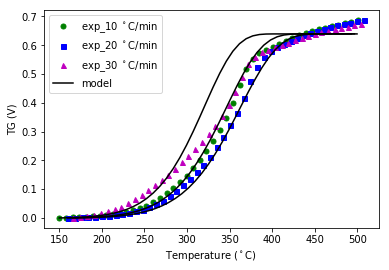

In [9]:
plt.plot(T_c,V_e,'o',ms=5,color = 'Green',label='exp_10 $^\circ$C/min')
plt.plot(T_c2,V_e2,'s',ms=5,color = 'Blue',label='exp_20 $^\circ$C/min')
plt.plot(T_c3,V_e3,'^',ms=5,color = 'M',label='exp_30 $^\circ$C/min')
plt.plot(T_c[0:45],r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[2],'k',label='model')
plt.plot(T_c2[0:44],r_m2(A1T,A2T,E1T,E2T,Y1T,Y2T)[2],'k')
plt.plot(T_c3[0:43],r_m3(A1T,A2T,E1T,E2T,Y1T,Y2T)[2],'k')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('TG (V)')
plt.legend()
plt.show()

In [10]:
print(r_m(A1T,A2T,E1T,E2T,Y1T,Y2T)[2])

[0.00000000e+00 4.83835855e-04 1.17461168e-03 2.14643287e-03
 3.49799048e-03 5.35342490e-03 7.87378819e-03 1.12576584e-02
 1.57502483e-02 2.16482979e-02 2.93015004e-02 3.91236949e-02
 5.15791786e-02 6.71776809e-02 8.64505416e-02 1.09926636e-01
 1.38069178e-01 1.71222552e-01 2.09499637e-01 2.52699458e-01
 3.00172991e-01 3.50796353e-01 4.02859918e-01 4.54177534e-01
 5.02280186e-01 5.44702839e-01 5.79413995e-01 6.05375384e-01
 6.22695657e-01 6.32662196e-01 6.37342016e-01 6.38983001e-01
 6.39340530e-01 6.39364951e-01 6.39362527e-01 6.39363223e-01
 6.39362878e-01 6.39363130e-01 6.39362880e-01 6.39363199e-01
 6.39362691e-01 6.39363680e-01 6.39361373e-01 6.39367731e-01
 6.39347259e-01]
